In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # graphis in python 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import QuantileTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb

!pip install pyod




pd.options.display.max_rows = None



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Getting the data
1- Login to Kaggle (if you don't have an account you'll have to register to get it) and download the complete dataset. Read the information about the data. What does a row in the main file represent? What does the target variable means?

One row represents one loan in our data sample. The target variable says wether the loan was repaid (0) or not (1)

2- Load the training and test datasets, we're only going to work withe "application_train.csv" and "application_test.csv" for now

In [ ]:
train_data = pd.read_csv('./application_train.csv')
test_data = pd.read_csv('./application_test.csv')

### Exploratory Data Analysis

A lot of the analysis of the data can be found on public available Kaggle kernels or blog posts, but you need to make sure you understand the datasets properties before starting working on it, so we'll do exploratory data analysis for the main files

**Dataset Basics**

1- Show the shape of the training and test datasets.

In [ ]:
### Complete in this cell: shape of the dataset

print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)

Train data shape:  (307511, 122)
Test data shape:  (48744, 121)


2- List all columns in the train dataset

In [ ]:
### Complete in this cell: Show all columns in the training dataset 
for col_names in train_data.columns: 
    print(col_names)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

3- Show the first 5 records of the training dataset, transpose the dataframe to see each record as a column and features as rows, make sure all features are visualized. Take your time to review what kind of information you can gather from this data.

In [ ]:
### Complete in this cell: show first 5 records in a transposed table
train_transposed = train_data.head()

train_transposed = train_transposed.T

train_transposed

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0,135000.0,121500.0
AMT_CREDIT,406597.5,1293502.5,135000.0,312682.5,513000.0
AMT_ANNUITY,24700.5,35698.5,6750.0,29686.5,21865.5


4- Show the distribution of the target variable values: print the total value count and the percentage of each value, plot this relationship.

0    282686
1     24825
Name: TARGET, dtype: int64
Total values: 307511


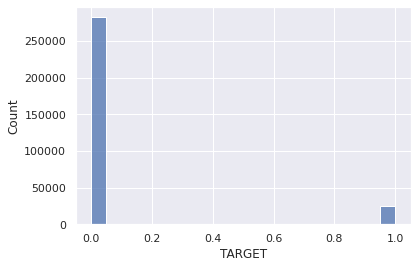

In [ ]:
sns.histplot(data=train_data, x="TARGET", bins=20)

Target_value_count = train_data.TARGET.value_counts()

print(Target_value_count)

summatory = sum(Target_value_count)

print("Total values:", summatory)

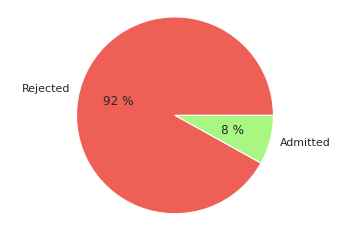

In [ ]:

names = ["Rejected","Admitted"]
color = ["#EE6055","#AAF683"]
plt.pie(Target_value_count, labels=names, autopct="%0.0f %%", colors=color)
plt.axis("equal")
plt.show()


5- Show the number of columns of each data type

In [ ]:
train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

6- For categorical variables, show the number of distinct values in each column (number of labels)

In [ ]:
### Complete in this cell: show number of unique values per categorical column


for col_names in train_data.columns:
    if train_data[col_names].dtype == 'object':
        print(col_names)
        print((train_data[col_names].value_counts().nunique()))
   
    

NAME_CONTRACT_TYPE
2
CODE_GENDER
3
FLAG_OWN_CAR
2
FLAG_OWN_REALTY
2
NAME_TYPE_SUITE
7
NAME_INCOME_TYPE
8
NAME_EDUCATION_TYPE
5
NAME_FAMILY_STATUS
6
NAME_HOUSING_TYPE
6
OCCUPATION_TYPE
18
WEEKDAY_APPR_PROCESS_START
7
ORGANIZATION_TYPE
58
FONDKAPREMONT_MODE
4
HOUSETYPE_MODE
3
WALLSMATERIAL_MODE
7
EMERGENCYSTATE_MODE
2


7- Analyzing missing data: show the percentage of missing data for each column ordered by percentage descending (show only the 20 columns with higher missing pct)



In [ ]:
### Complete in this cell: checking missing data

missing_data = train_data.isnull().sum()
missing_data_frame = pd.DataFrame(missing_data)
missing_data_frame.rename({0: 'Number of na'}, axis=1, inplace=True)



missing_data_frame["percentage %"] = 100 * missing_data / len(train_data)
missing_data_frame.sort_values("percentage %", ascending=False, inplace=True)
missing_data_frame.head(20)



,Number of na,percentage %
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


**Analyzing distribution of variables**

1- Show the distribution of credit amounts

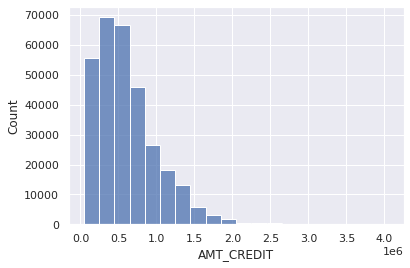

In [ ]:
sns.histplot(data=train_data, x="AMT_CREDIT", bins=20)

2- Plot the education level of the credit applicants, show the percentages of each category. Also print the total counts for each category.

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
Total values: 307511


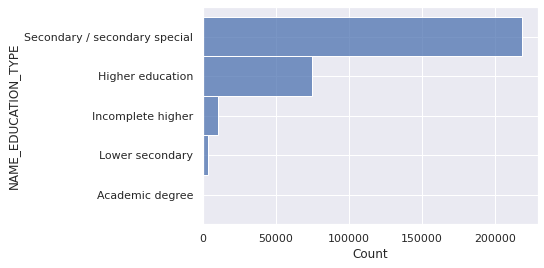

In [ ]:
### Complete in this cell: level of education plot

Education_type_value_count = train_data.NAME_EDUCATION_TYPE.value_counts()

print(Education_type_value_count)

summatory = sum(Education_type_value_count)

sns.histplot(data=train_data, y="NAME_EDUCATION_TYPE")


print("Total values:", summatory)

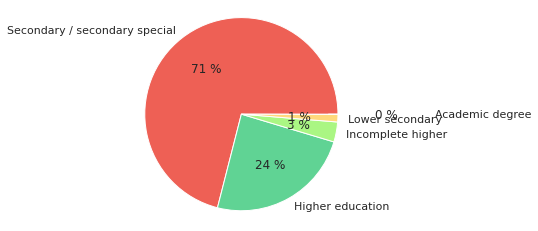

In [ ]:
nombres = ["Secondary / secondary special","Higher education ","Incomplete higher","Lower secondary", "Academic degree"]
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#031B80"]
desfase = (0, 0, 0, 0, 0.9)
plt.pie(Education_type_value_count, labels=nombres, autopct="%0.0f %%", colors=colores,  explode=desfase)
plt.axis("equal")
plt.show()

3- Plot the distribution of ocupation of the loan applicants

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


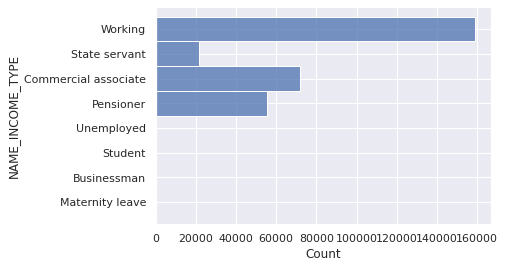

In [ ]:
### Complete in this cell: ocupation of applicants

NAME_INCOME_TYPE_value = train_data.NAME_INCOME_TYPE.value_counts()
print(NAME_INCOME_TYPE_value)

sns.histplot(data=train_data, y="NAME_INCOME_TYPE")


4- Plot the family status of the applicants



Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64


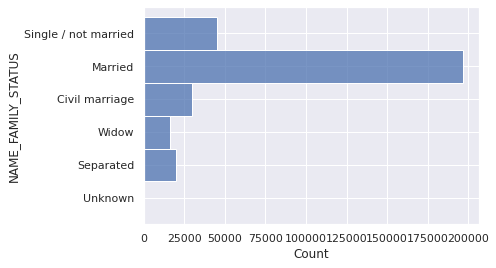

In [ ]:
### Complete in this cell: family status
NAME_FAMILY_STATUS_value = train_data.NAME_FAMILY_STATUS.value_counts()
print(NAME_FAMILY_STATUS_value)

sns.histplot(data=train_data, y="NAME_FAMILY_STATUS")



5- Plot the income type of applicants grouped by the target variable

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  \
TARGET                                                                 
0                          10                 66257                3   
1                           0                  5360                2   

NAME_INCOME_TYPE  Pensioner  State servant  Student  Unemployed  Working  
TARGET                                                                    
0                     52380          20454       18          14   143550  
1                      2982           1249        0           8    15224  


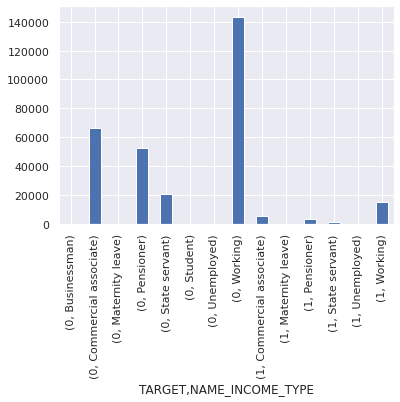

In [ ]:
### Complete in this cell: Income type of applicants by target variable
groups = train_data.groupby(['TARGET','NAME_INCOME_TYPE']).size()

groups.plot.bar()



print(train_data.groupby(['TARGET','NAME_INCOME_TYPE']).size().unstack(fill_value=0))


## Preprocessing

In this section, you will code a function to make all the data pre processing for the dataset. What you have to deliver is a function that takes the train and test dataframes, processes all features, and returns the transformed data as numpy arrays ready to be used for training.

The function should perform these activities:

- Correct outliers/anomalous values in numerical columns (hint: take a look at the DAYS_EMPLOYED column)
- Impute values for all columns with missing data (use median as imputing value)
- Encode categorical features:
    - If feature has 2 categories encode using binary encoding
    - More than 2 categories, use one hot encoding 
- Feature scaling

Keep in mind that you could get different number of columns in train and test because some category could only be present in one of the dataframes, this could create more one hot encoded columns. You should align train and test to have the same number of columns

In [ ]:
train_data = pd.read_csv('./application_train.csv')
test_data = pd.read_csv('./application_test.csv')

In [ ]:
def pre_processing(train, test):
  numeric = []
  no_numeric = []
  for col_names in train_data:
    if train_data[col_names].dtype == 'object':
      no_numeric.append(col_names)
    else:
      numeric.append(col_names)

  numeric.remove('SK_ID_CURR')
  numeric.remove("TARGET")

  imput_no_num = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
  train[no_numeric] = imput_no_num.fit_transform(train[no_numeric])
  test[no_numeric] = imput_no_num.transform(test[no_numeric])

  imput_num = SimpleImputer(missing_values=np.nan, strategy='median')
  train[numeric] = imput_num.fit_transform(train[numeric])
  test[numeric] = imput_num.transform(test[numeric])

  train['DAYS_EMPLOYED'].replace({365243: 0}, inplace = True)
  test["DAYS_EMPLOYED"].replace({365243: 0}, inplace = True)


  X_train =  train.drop(columns=["TARGET","SK_ID_CURR"])
  test = test.drop(columns=["SK_ID_CURR"])
  y_train = train["TARGET"]

  preprocessor = ColumnTransformer(transformers=[("num",QuantileTransformer(), selector(dtype_include=np.number)),
                                                 ("cat", OneHotEncoder(handle_unknown='ignore', drop="if_binary"), selector(dtype_include=object))], remainder="passthrough")
  
  X_train = preprocessor.fit_transform(X_train)
  test = preprocessor.transform(test)
  train = np.concatenate([X_train, y_train.to_numpy().reshape(-1,1)], axis=1)

  return train, test

In [ ]:
X_train, X_test = pre_processing(train=train_data, test=test_data)

## Training Models

As usual, you will start training simple models and will progressively move to more complex models and pipelines.

### Baseline: LogisticRegression

1- Import LogisticRegression from sklearn and train a model using the preprocesed train data from the previous section, and just default parameters. If you receive a warning because the algorithm failed to converge, try increasing the number of iterations or decreasing the C parameter

In [ ]:
log_reg = LogisticRegression(max_iter = 2000, random_state=42)
log_reg.fit(X_train[:,:-1], X_train[:,-1])


LogisticRegression(max_iter=2000, random_state=42)

2- Use the trained model to predict probabilites for the test data, and then save the results to a csv in the format expected in the competition: a SK_ID_CURR column and a TARGET column with probabilities. REMEMBER: the TARGET columns should ONLY contain the probabilities that the debt is not repaid (equivalent to the class 1).

In [ ]:
### Complete in this cell: predict test data and save csv
result = log_reg.predict_proba(X_test)
test_data["TARGET"] = result[:,1]

3- Go to the Kaggle competition, and in the submissions page load your csv file. Report here the result in the private score you obtained.

At this point, the model should produce a result around 0.67

In [ ]:
### Complete in this cell: predict test data and save csv
result = test_data[["SK_ID_CURR","TARGET"]]

result.to_csv("log_reg_baseline_model.csv", index = False)
test_data.drop(columns = ["TARGET"], inplace=True)

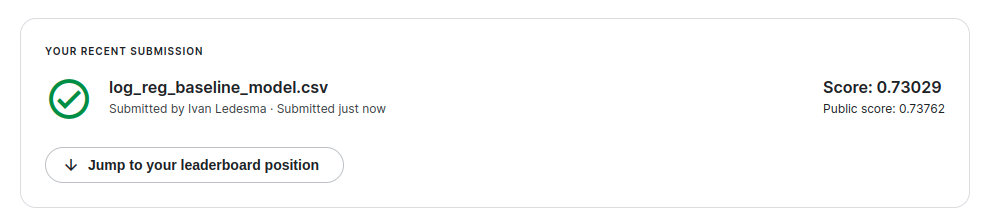

### Training a Random Forest Classifier 

You're gonna start working in more complex models: ensambles, particularly, you're going to use the Random Forest Classifier from Scikit Learn. 

1- Train a RandomForestClassifier, print the time taken by the fit function. Just use default hyperparameters, except for n_jobs, which should be set to "-1" to allow the library to use all CPU cores to speed up training time.

In [ ]:
rf_model_clf = RandomForestClassifier(n_jobs=-1, random_state=8)

In [ ]:
rf_model_clf.fit(X_train[:,:-1], X_train[:,-1])


RandomForestClassifier(n_jobs=-1, random_state=8)

2- Use the classifier to predict probabilities on the test set, and save the results to a csv file.

In [ ]:
pred = rf_model_clf.predict_proba(X_test)
pred[:,1]

array([0.03, 0.09, 0.  , ..., 0.08, 0.09, 0.14])

3- Load the predictions to the competition. Report the private score here.


In [ ]:
test_data["TARGET"] = pred[:,1]
result = test_data[["SK_ID_CURR","TARGET"]]

result.to_csv("random_forest_clf.csv", index = False)
test_data.drop(columns = ["TARGET"], inplace=True)

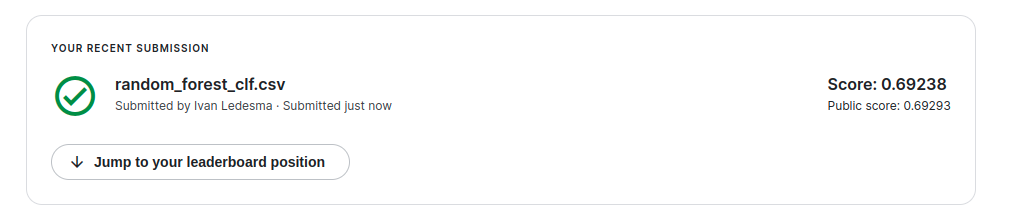

### Randomized Search with Cross Validation

So far, we've only created models using the default hyperparameters of each algorithm. This is usually something that we would only do for baseline models, hyperparameter tuning is a very important part of the modeling process and is often the difference between having an acceptable model or not.

But, there are usually lots of hyperparameters to tune and a finite amount of time to do it, you have to consider the time and resources it takes to find an optimal combination of them. In the previous section you trained a random forest classifier and saw how much it took to train it once in your PC. If you want to do hyperparameter optimization you now have to consider that you will have to train the algorithm N number of times, with N being the cartesian product of all parameters. 

Furthermore, you can't validate the performance of your trained models on the test set, as this data should only be used to validate the final model. So we have to implement a validation strategy, K-Fold Cross Validation being the most common. But this also adds time complexity to our training, because we will have to train each combinations of hyperparameters M number of times, X being the number of folds in which we divided our dataset, so the total number of training iterations will be NxM... this resulting number can grow VERY quickly.

Fortunately there are strategies to mitigate this, here you're going to select a small number of hyperparameters to test a RandomForestClassifier, and use a Randomized Search algorithm with K-Fold Cross Validation to avoid doing a full search across the grid. 

Remember: take in consideration how much time it took to train a single classifier, and define the number of cross validations folds and iterations of the search accordingly. 
A recommendation: run the training process, go make yourself a cup of coffee, sit somewhere comfortably and forget about it for a while.



1- Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier. The validation metric used to evaluate the models should be "roc_auc".

In [ ]:
### Complete in this cell: Use RandomizedSearchCV to find the best combination of hyperparameters for a RandomForestClassifier
example_hyperparameter_grid = {
 'bootstrap': [True, False],
 'max_depth': [100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [100, 200]
}

In [ ]:
rf_model = RandomForestClassifier(n_jobs=-1, random_state=12)

clf = RandomizedSearchCV(rf_model, example_hyperparameter_grid, scoring="roc_auc", cv=5, random_state=6)
search = clf.fit(X_train[:,:-1], X_train[:,-1])

In [ ]:
search.best_params_

{'bootstrap': False,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
rf_model = RandomForestClassifier(n_jobs=-1, random_state=12, bootstrap=False, max_depth=100, max_features="auto", min_samples_leaf=2, min_samples_split=5, n_estimators=200)

In [ ]:
rf_model.fit(X_train[:,:-1], X_train[:,-1])


RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, n_jobs=-1,
                       random_state=12)

In [ ]:
pred2 = rf_model.predict_proba(X_test)
pred2[:,1]

array([0.045     , 0.11296316, 0.04529274, ..., 0.03541667, 0.04527778,
       0.11525335])

2- Use the classifier to predict probabilities on the test set, and save the results to a csv file.

In [ ]:
test_data["TARGET"] = pred2[:,1]
result = test_data[["SK_ID_CURR","TARGET"]]


result.to_csv("random_tuned.csv", index = False)
test_data.drop(columns = ["TARGET"], inplace=True)

3- Load the predictions to the competition. Report the private score here.

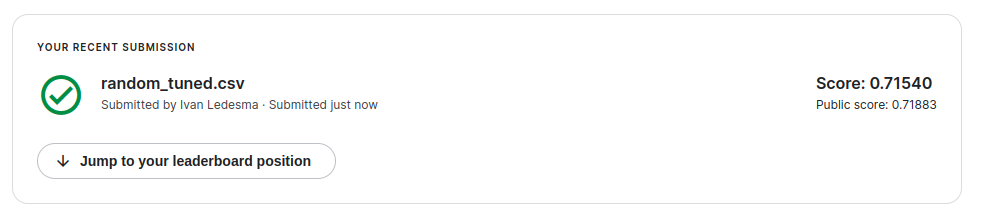